# TASK - 01

## Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the dataset of total population

In [5]:
total_api_file_path = "API_SP.POP.TOTL_DS2_en_csv_v2_1584446.csv"
total_metadata_country_file_path = "Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_1584446.csv"
total_metadata_indicator_file_path = "Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_1584446.csv"

In [6]:
total_api_df = pd.read_csv(total_api_file_path, skiprows = 4)
total_metadata_country_df = pd.read_csv(total_metadata_country_file_path)
total_metadata_indicator_df = pd.read_csv(total_metadata_indicator_file_path)

In [7]:
total_api_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


In [9]:
total_metadata_country_df.head(5)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [11]:
total_metadata_indicator_df

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...,NaN


### Merge the datasets to create the final combined dataset of total population.

In [12]:
final_df = pd.merge(total_api_df, total_metadata_country_df , on = 'Country Code', how = 'inner')

In [54]:
final_df.drop(columns = ['Indicator Name', 'Indicator Code', 'SpecialNotes', 'Unnamed: 5'],axis = 1, inplace = True) 

In [13]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [14]:
final_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')

### EDA and Data Visualization

In [3]:
from matplotlib.ticker import FuncFormatter

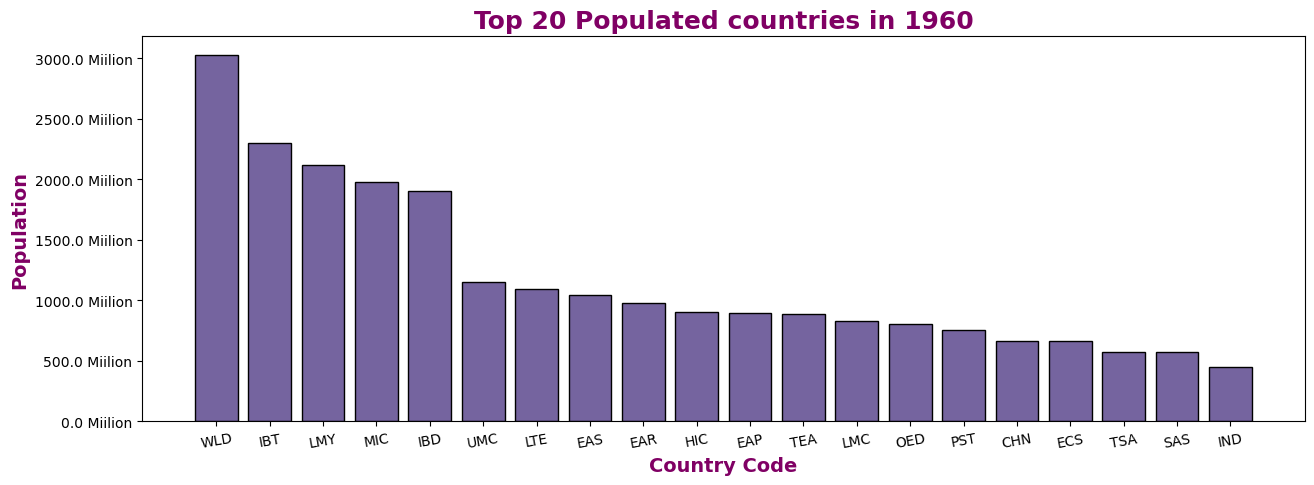

In [15]:
# filtering the data to select top 20 populated countries and sorting it 

filt_data1 = final_df.sort_values(by = '1960', ascending = False, na_position = 'last')

# plotting the bar graph for population in 1960
fig = plt.figure(figsize = (15, 5))
plt.bar(filt_data1['Country Code'].head(20), filt_data1['1960'].head(20), color='#75649f', edgecolor='black')

def millions(x, pos):
    return '%1.1f Miilion' % (x * 1e-6)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

#setting labels
plt.xlabel('Country Code', fontsize=14, fontweight='bold', color='#800064')
plt.ylabel('Population', fontsize=14, fontweight='bold', color='#800064')
plt.title('Top 20 Populated countries in 1960', fontsize=18, fontweight='bold', color='#800064')
plt.xticks(rotation = 10) # rotating the labels for better readability and using country code instead of full names

plt.show()

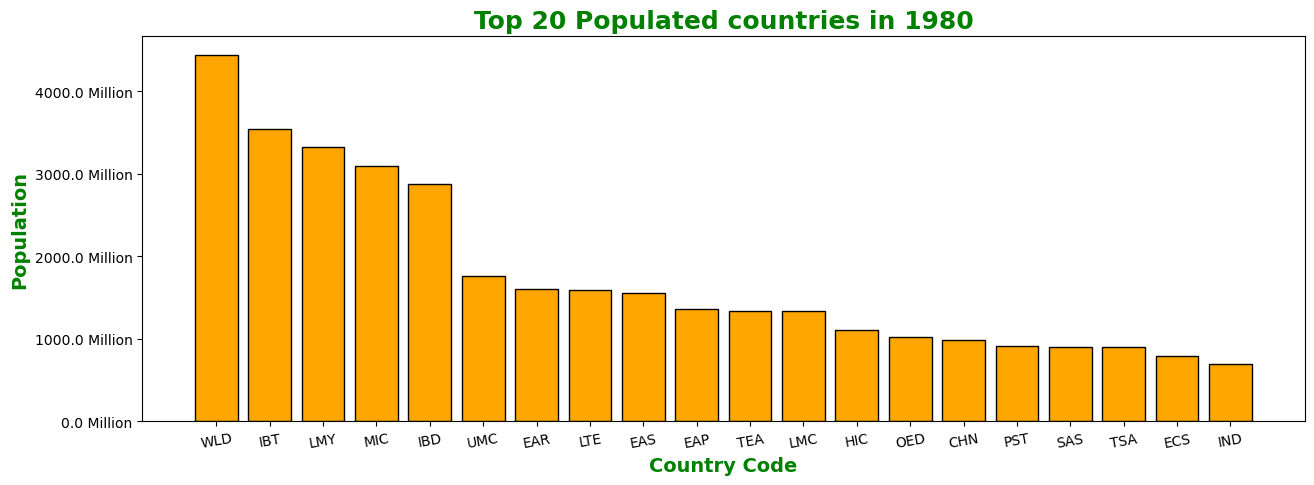

In [192]:
# filtering the data to select top 20 populated countries and sorting it 

filt_data2 = final_df.sort_values(by = '1980', ascending = False, na_position = 'last')

# plotting the bar graph for population in 1980
fig = plt.figure(figsize = (15, 5))
plt.bar(filt_data2['Country Code'].head(20), filt_data2['1980'].head(20), color='orange', edgecolor='black')

def millions(x, pos):
    return '%1.1f Million' % (x * 1e-6)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

#setting labels
plt.xlabel('Country Code', fontsize=14, fontweight='bold', color='green')
plt.ylabel('Population', fontsize=14, fontweight='bold', color='green')
plt.title('Top 20 Populated countries in 1980', fontsize=18, fontweight='bold', color='green')
plt.xticks(rotation = 10) # rotating the labels for better readability and using country code instead of full names

plt.show()

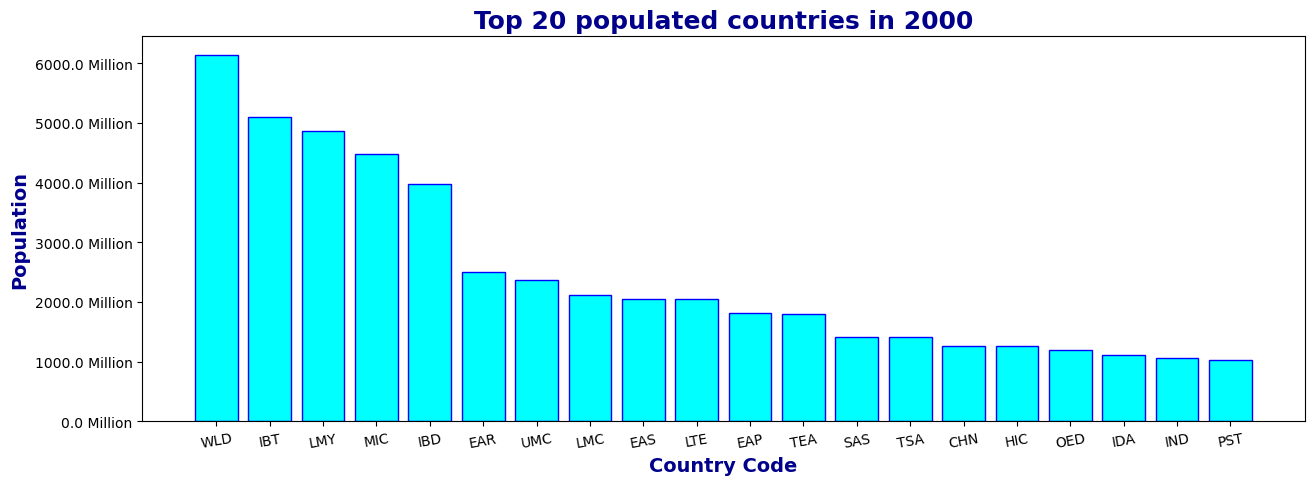

In [203]:
# filtering the data to select top 20 populated countries and sorting it 

filt_data3 = final_df.sort_values(by = '2000', ascending = False, na_position = 'last')

# plotting the bar graph for population in 2000
fig = plt.figure(figsize = (15, 5))
plt.bar(filt_data3['Country Code'].head(20), filt_data3['2000'].head(20), color='cyan', edgecolor='blue')

def millions(x, pos):
    return '%1.1f Million' % (x * 1e-6)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

#setting labels
plt.xlabel('Country Code', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Population', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Top 20 populated countries in 2000', fontsize=18, fontweight='bold', color='darkblue')
plt.xticks(rotation = 10) # rotating the labels for better readability and using country code instead of full names

plt.show()

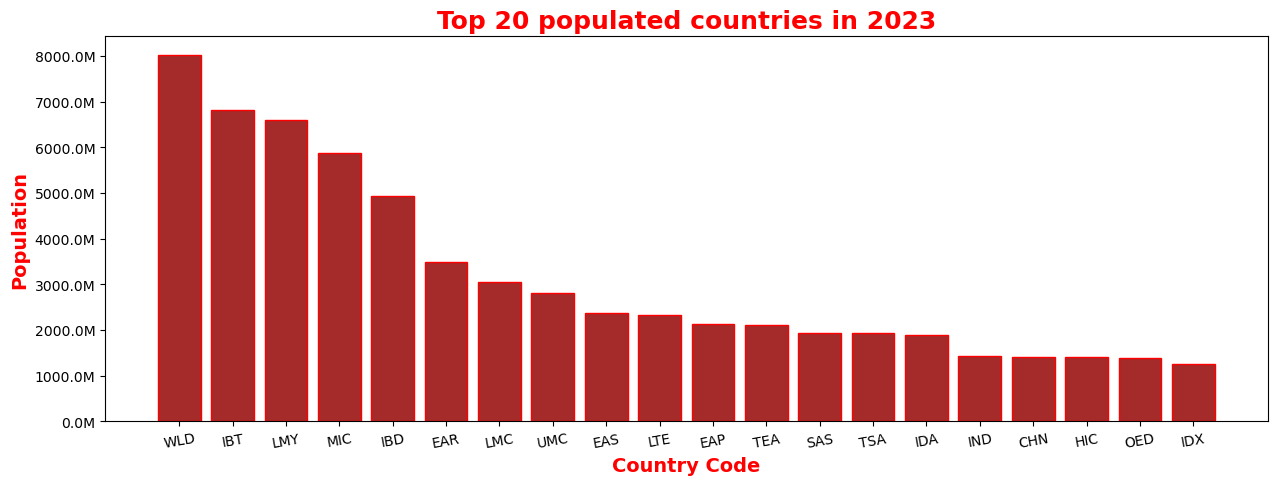

In [218]:
# filtering the data to select top 20 populated countries and sorting it 

filt_data4 = final_df.sort_values(by = '2023', ascending = False, na_position = 'last')

# plotting the bar graph for population in 2023
fig = plt.figure(figsize = (15, 5))
plt.bar(filt_data4['Country Code'].head(20), filt_data4['2023'].head(20), color='brown', edgecolor='red')

def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

#setting labels
plt.xlabel('Country Code', fontsize=14, fontweight='bold', color='red')
plt.ylabel('Population', fontsize=14, fontweight='bold', color='red')
plt.title('Top 20 populated countries in 2023', fontsize=18, fontweight='bold', color='red')
plt.xticks(rotation = 10) # rotating the labels for better readability and using country code instead of full names

plt.show()

In [17]:
region_df = final_df[['Country Name',  'Country Code', '2023', 'Region']]

In [18]:
region_data = region_df.groupby('Region')['2023'].sum().reset_index()
region_data

,Region,2023
0,East Asia & Pacific,2.357228e+09
1,Europe & Central Asia,9.239298e+08
2,Latin America & Caribbean,6.641553e+08
3,Middle East & North Africa,5.007873e+08
4,North America,3.750761e+08
5,South Asia,1.938550e+09
6,Sub-Saharan Africa,1.241898e+09


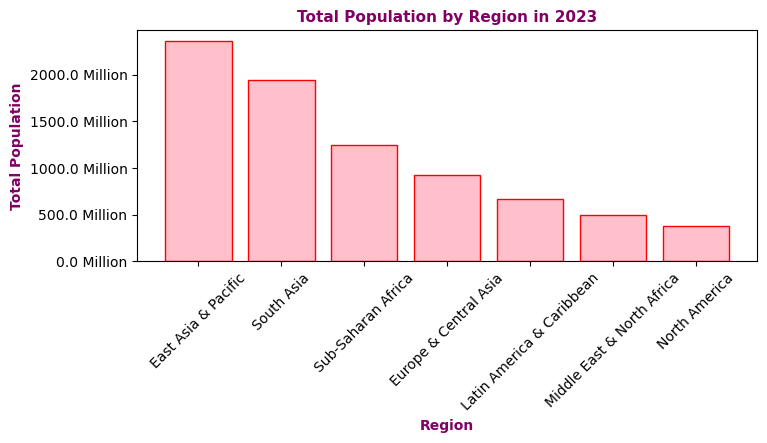

In [19]:
filt_data5 = region_data.sort_values(by='2023', ascending=False, na_position='last')

# Plotting the bar graph for population in 2023
fig = plt.figure(figsize=(8, 3))
plt.bar(filt_data5['Region'], filt_data5['2023'], color='pink', edgecolor='red')

# Define a function to format y-axis values in millions
def millions(x, pos):
    return '%1.1f Million' % (x * 1e-6)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

# Setting labels
plt.xlabel('Region', fontsize=10, fontweight='bold', color='#800064')
plt.ylabel('Total Population', fontsize=10, fontweight='bold', color='#800064')
plt.title('Total Population by Region in 2023', fontsize=11, fontweight='bold', color='#800064')
plt.xticks(rotation=45)  # Rotating the labels for better readability

plt.show()


In [224]:
# creating the dataframe of population grouped by income class
pop_class = pd.DataFrame(final_df.groupby('IncomeGroup')['2023'].sum())
pop_class

,2023
IncomeGroup,
High income,1.379648e+09
Low income,7.229841e+08
Lower middle income,3.059565e+09
Upper middle income,2.810588e+09


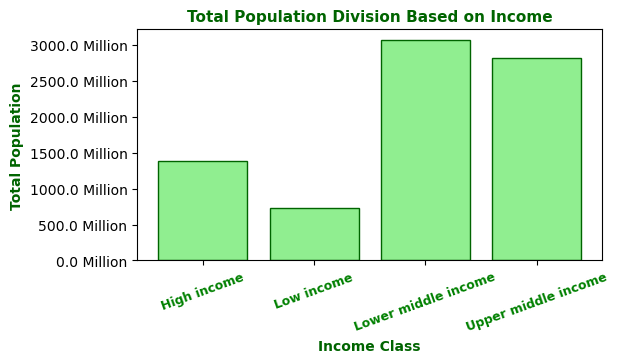

In [275]:
#creating the bar graph for it 
fig = plt.figure(figsize=(6, 3))
plt.bar(pop_class.index, pop_class['2023'], color='lightgreen', edgecolor = 'darkgreen')

# Define a function to format y-axis values in millions
def millions(x, pos):
    return '%1.1f Million' % (x * 1e-6)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))


#setting labels
plt.xlabel('Income Class', fontsize=10, fontweight='bold', color='darkgreen')
plt.ylabel('Total Population', fontsize=10, fontweight='bold', color='darkgreen')
plt.xticks(rotation = 20, fontsize=9, fontweight='bold', color='green')

#setting title
plt.title('Total Population Division Based on Income', fontsize=11, fontweight='bold', color='darkgreen')

plt.show()


#

## Comparing the total population and gender ratio in different countries based on similar years

### Loading the dataset of male population

In [276]:
male_api_file_path = "API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_1597510.csv"
male_metadata_country_file_path = "Metadata_Country_API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_1597510.csv"
male_metadata_indicator_file_path = "Metadata_Indicator_API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_1597510.csv"

In [288]:
male_api_df = pd.read_csv(male_api_file_path, skiprows = 4)
male_metadata_country_df = pd.read_csv(male_metadata_country_file_path)
male_metadata_indicator_df = pd.read_csv(male_metadata_indicator_file_path)

In [289]:
male_api_df.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, male",SP.POP.TOTL.MA.IN,26834.0,27431.0,27863.0,28256.0,28608.0,28906.0,29155.0,29268.0,29239.0,29163.0,29044.0,28890.0,28902.0,29137.0,29433.0,29744.0,29947.0,30049.0,30154.0,30257.0,30358.0,30492.0,30727.0,31024.0,31288.0,31471.0,31547.0,31547.0,31544.0,31703.0,32231.0,33207.0,34251.0,35223.0,36273.0,37325.0,38403.0,39522.0,40667.0,41816.0,42833.0,43513.0,43950.0,44327.0,44663.0,45069.0,45591.0,46151.0,46724.0,47292.0,47858.0,48307.0,48632.0,48927.0,49191.0,49430.0,49650.0,49847.0,50026.0,50188.0,50211.0,50207.0,50173.0,50052.0,NaN
1,Africa Eastern and Southern,AFE,"Population, male",SP.POP.TOTL.MA.IN,64839355.0,66562958.0,68378478.0,70254903.0,72219820.0,74263952.0,76345445.0,78502294.0,80763883.0,83102560.0,85507051.0,87998383.0,90547667.0,93207480.0,96034288.0,98944416.0,101913663.0,104883320.0,108065436.0,111481953.0,114907283.0,118411702.0,121976676.0,125446413.0,128864585.0,132374918.0,136219908.0,140423504.0,144506848.0,148602519.0,152948450.0,157246001.0,161323998.0,165457214.0,169655623.0,173980232.0,178517277.0,183072227.0,187706530.0,192526561.0,197551972.0,202744227.0,208105454.0,213639672.0,219383109.0,225323582.0,231510642.0,237971119.0,244643269.0,251454018.0,258458696.0,265618237.0,272984078.0,280667225.0,288561965.0,296812526.0,304990205.0,313109208.0,321598038.0,330312015.0,339223107.0,348121884.0,357024605.0,366123110.0,NaN


In [290]:
male_metadata_country_df.head(2)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN


In [291]:
male_metadata_indicator_df

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.POP.TOTL.MA.IN,"Population, male",Male population is based on the de facto defin...,World Bank staff estimates using the World Ban...,NaN


### Merge the datasets to create the final combined dataset of male population.

In [299]:
male_df = pd.merge(male_api_df, male_metadata_country_df , on = 'Country Code', how = 'inner')

In [ ]:
male_df.drop(columns = ['Indicator Name', 'Indicator Code', 'SpecialNotes', 'Unnamed: 68', 'Unnamed: 5'],axis = 1, inplace = True) 

In [304]:
male_df.columns

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', 'Region', 'IncomeGroup',
       'TableName'],
      dtype='object')

### EDA and Data Visualization

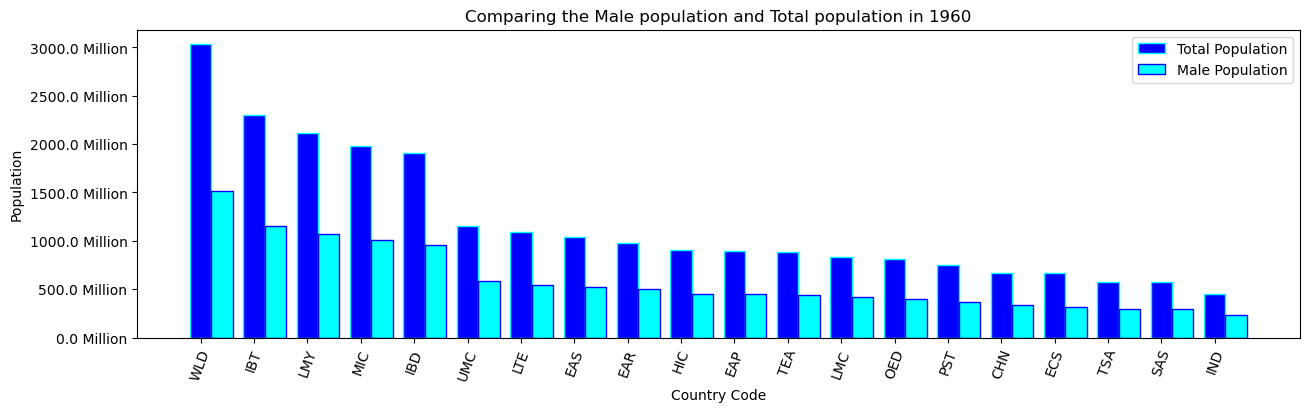

In [324]:
# Sorting the data to create the visualization of top populated countries
filt_data6 = final_df.sort_values(by = '1960', ascending = False, na_position = 'last')
filt_data7 = male_df.sort_values(by = '1960', ascending = False, na_position = 'last')

# plotting the bar graph for population in 1960
fig = plt.figure(figsize = (15, 4))

#setting index to create a grouped bar chart
barwidth = 0.4
index = filt_data6['Country Code'].head(20)
newindex = [i + barwidth for i in range(len(index))]


plt.bar(x = index, height = filt_data6['1960'].head(20), label = 'Total Population', width = barwidth, color = 'blue', edgecolor = 'cyan')
plt.bar(x = newindex, height = filt_data7['1960'].head(20), label = 'Male Population', width = barwidth, color = 'cyan', edgecolor = 'blue')


# Define a function to format y-axis values in millions
def millions(x, pos):
    return '%1.1f Million' % (x * 1e-6)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

#setting labels
plt.xlabel('Country Code')
plt.ylabel('Population')
plt.title('Comparing the Male population and Total population in 1960')
plt.xticks(rotation = 70) # rotating the labels for better readability and using country code instead of full names

plt.legend()
plt.show()

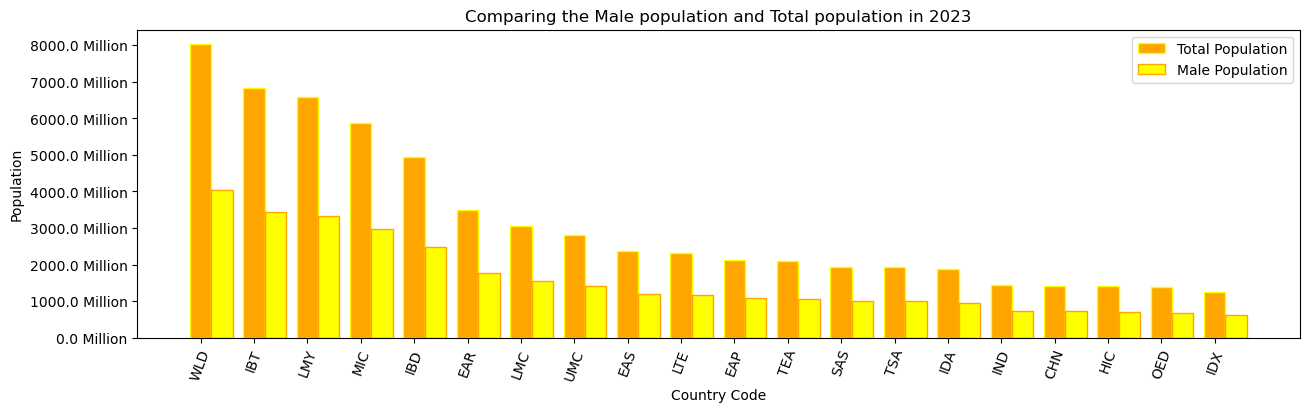

In [325]:
# Sorting the data to create the visualization of top populated countries
filt_data8 = final_df.sort_values(by = '2023', ascending = False, na_position = 'last')
filt_data9 = male_df.sort_values(by = '2023', ascending = False, na_position = 'last')

# plotting the bar graph for population in 2023
fig = plt.figure(figsize = (15, 4))

#setting index to create a grouped bar chart
barwidth = 0.4
index = filt_data8['Country Code'].head(20)
newindex = [i + barwidth for i in range(len(index))]


plt.bar(x = index, height = filt_data8['2023'].head(20), label = 'Total Population', width = barwidth, color = 'orange', edgecolor = 'yellow')
plt.bar(x = newindex, height = filt_data9['2023'].head(20), label = 'Male Population', width = barwidth, color = 'yellow', edgecolor = 'orange')


# Define a function to format y-axis values in millions
def millions(x, pos):
    return '%1.1f Million' % (x * 1e-6)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

#setting labels
plt.xlabel('Country Code')
plt.ylabel('Population')
plt.title('Comparing the Male population and Total population in 2023')
plt.xticks(rotation = 70) # rotating the labels for better readability and using country code instead of full names

plt.legend()
plt.show()

### Loading the dataset of female population

In [326]:
female_api_file_path = "API_SP.POP.TOTL.FE.IN_DS2_en_csv_v2_1589620.csv"
female_metadata_country_file_path = "Metadata_Country_API_SP.POP.TOTL.FE.IN_DS2_en_csv_v2_1589620.csv"
female_metadata_indicator_file_path = "Metadata_Indicator_API_SP.POP.TOTL.FE.IN_DS2_en_csv_v2_1589620.csv"

In [327]:
female_api_df = pd.read_csv(female_api_file_path, skiprows = 4)
female_metadata_country_df = pd.read_csv(female_metadata_country_file_path)
female_metadata_indicator_df = pd.read_csv(female_metadata_indicator_file_path)

In [329]:
female_api_df.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, female",SP.POP.TOTL.FE.IN,27773.0,28380.0,28820.0,29218.0,29570.0,29875.0,30135.0,30253.0,30232.0,30166.0,30063.0,29927.0,29953.0,30229.0,30595.0,30972.0,31245.0,31416.0,31584.0,31749.0,31909.0,32121.0,32389.0,32659.0,32886.0,33008.0,33007.0,32904.0,32788.0,32892.0,33480.0,34657.0,35941.0,37137.0,38437.0,39724.0,41014.0,42336.0,43688.0,45050.0,46269.0,47178.0,47831.0,48374.0,48877.0,49414.0,50016.0,50636.0,51272.0,51919.0,52484.0,52980.0,53480.0,53953.0,54403.0,54828.0,55224.0,55591.0,55935.0,56254.0,56373.0,56330.0,56272.0,56225.0,NaN
1,Africa Eastern and Southern,AFE,"Population, female",SP.POP.TOTL.FE.IN,65853220.0,67606287.0,69457112.0,71375643.0,73386167.0,75478396.0,77610073.0,79810945.0,82111287.0,84493601.0,86968714.0,89504801.0,92051419.0,94694181.0,97478670.0,100339888.0,103289004.0,106237590.0,109415983.0,112834021.0,116060576.0,119525759.0,123410049.0,127333314.0,131344567.0,135563206.0,139816011.0,144066893.0,148288335.0,152522362.0,156942214.0,161298074.0,165609524.0,170167926.0,174762745.0,179486372.0,184468529.0,189280003.0,194009070.0,198959676.0,204048614.0,209257664.0,214635664.0,220167814.0,225898442.0,231830259.0,237997868.0,244435307.0,251105628.0,257956460.0,265000967.0,272174714.0,279546577.0,287224924.0,295089133.0,303195897.0,311387401.0,319637365.0,328159112.0,336930970.0,345889868.0,354855221.0,363834524.0,372985196.0,NaN


In [330]:
female_metadata_country_df.head(2)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN


In [331]:
female_metadata_indicator_df

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.POP.TOTL.FE.IN,"Population, female",Female population is based on the de facto def...,World Bank staff estimates using the World Ban...,NaN


### Merge the datasets to create the final combined dataset of female population.

In [333]:
female_df = pd.merge(female_api_df, female_metadata_country_df , on = 'Country Code', how = 'inner')

In [336]:
female_df.drop(columns = ['Indicator Name', 'Indicator Code', 'SpecialNotes', 'Unnamed: 68', 'Unnamed: 5'],axis = 1, inplace = True) 

In [337]:
female_df.columns

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', 'Region', 'IncomeGroup',
       'TableName'],
      dtype='object')

### EDA and Data Visualization

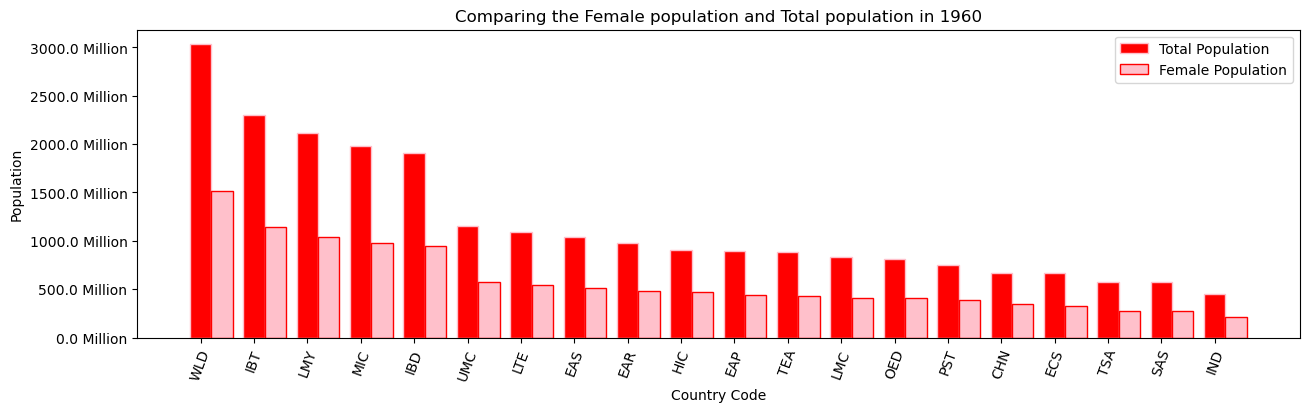

In [344]:
# Sorting the data to create the visualization of top populated countries
filt_data10 = final_df.sort_values(by = '1960', ascending = False, na_position = 'last')
filt_data11 = female_df.sort_values(by = '1960', ascending = False, na_position = 'last')

# plotting the bar graph for population in 1960
fig = plt.figure(figsize = (15, 4))

#setting index to create a grouped bar chart
barwidth = 0.4
index = filt_data10['Country Code'].head(20)
newindex = [i + barwidth for i in range(len(index))]


plt.bar(x = index, height = filt_data10['1960'].head(20), label = 'Total Population', width = barwidth, color = 'red', edgecolor = 'pink')
plt.bar(x = newindex, height = filt_data11['1960'].head(20), label = 'Female Population', width = barwidth, color = 'pink', edgecolor = 'red')


# Define a function to format y-axis values in millions
def millions(x, pos):
    return '%1.1f Million' % (x * 1e-6)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

#setting labels
plt.xlabel('Country Code')
plt.ylabel('Population')
plt.title('Comparing the Female population and Total population in 1960')
plt.xticks(rotation = 70) # rotating the labels for better readability and using country code instead of full names

plt.legend()
plt.show()

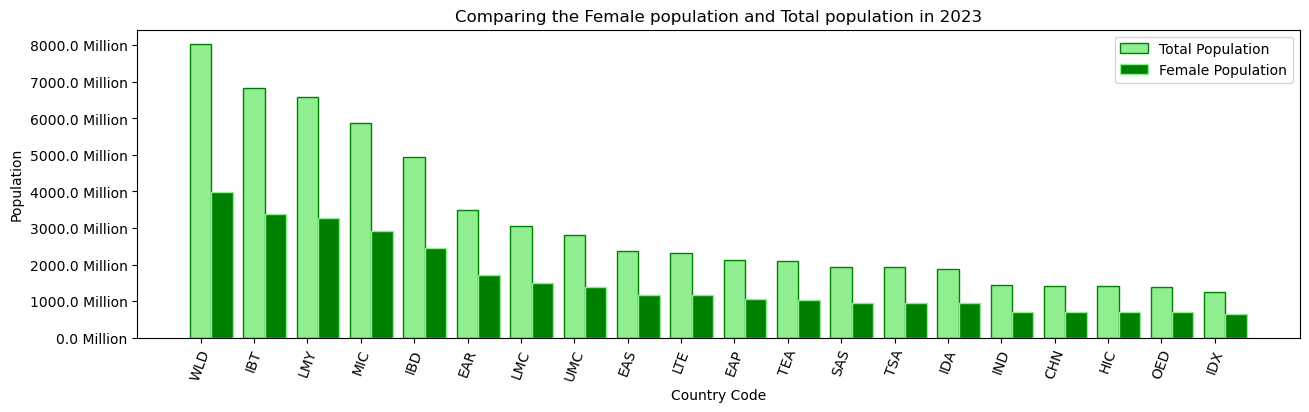

In [345]:
# Sorting the data to create the visualization of top populated countries
filt_data12 = final_df.sort_values(by = '2023', ascending = False, na_position = 'last')
filt_data13 = female_df.sort_values(by = '2023', ascending = False, na_position = 'last')

# plotting the bar graph for population in 202
fig = plt.figure(figsize = (15, 4))

#setting index to create a grouped bar chart
barwidth = 0.4
index = filt_data12['Country Code'].head(20)
newindex = [i + barwidth for i in range(len(index))]


plt.bar(x = index, height = filt_data12['2023'].head(20), label = 'Total Population', width = barwidth, color = 'lightgreen', edgecolor = 'green')
plt.bar(x = newindex, height = filt_data13['2023'].head(20), label = 'Female Population', width = barwidth, color = 'green', edgecolor = 'lightgreen')


# Define a function to format y-axis values in millions
def millions(x, pos):
    return '%1.1f Million' % (x * 1e-6)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

#setting labels
plt.xlabel('Country Code')
plt.ylabel('Population')
plt.title('Comparing the Female population and Total population in 2023')
plt.xticks(rotation = 70) # rotating the labels for better readability and using country code instead of full names

plt.legend()
plt.show()

### Comparing the male  and female ratio in different countries based on year 2023

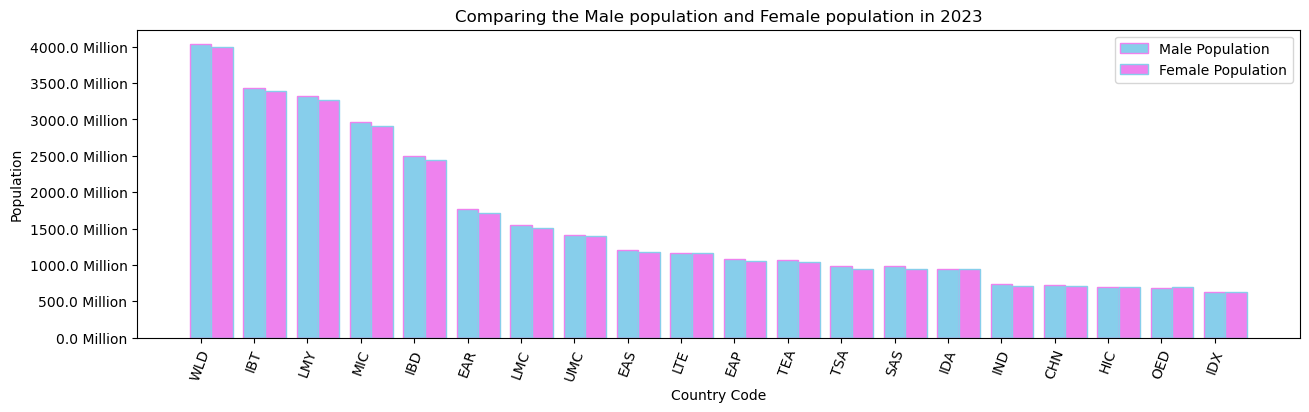

In [349]:
# Sorting the data to create the visualization of top populated countries
filt_data14 = male_df.sort_values(by = '2023', ascending = False, na_position = 'last')
filt_data15 = female_df.sort_values(by = '2023', ascending = False, na_position = 'last')

# plotting the bar graph for population in 2023s
fig = plt.figure(figsize = (15, 4))

#setting index to create a grouped bar chart
barwidth = 0.4
index = filt_data14['Country Code'].head(20)
newindex = [i + barwidth for i in range(len(index))]


plt.bar(x = index, height = filt_data14['2023'].head(20), label = 'Male Population', width = barwidth, color = 'skyblue', edgecolor = 'violet')
plt.bar(x = newindex, height = filt_data15['2023'].head(20), label = 'Female Population', width = barwidth, color = 'violet', edgecolor = 'skyblue')


# Define a function to format y-axis values in millions
def millions(x, pos):
    return '%1.1f Million' % (x * 1e-6)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

#setting labels
plt.xlabel('Country Code')
plt.ylabel('Population')
plt.title('Comparing the Male population and Female population in 2023')
plt.xticks(rotation = 70) # rotating the labels for better readability and using country code instead of full names

plt.legend()
plt.show()

In [366]:
# creating the dataframe of population grouped by income class
male_class = pd.DataFrame(male_df.groupby('IncomeGroup')['2023'].sum())
female_class = pd.DataFrame(female_df.groupby('IncomeGroup')['2023'].sum())

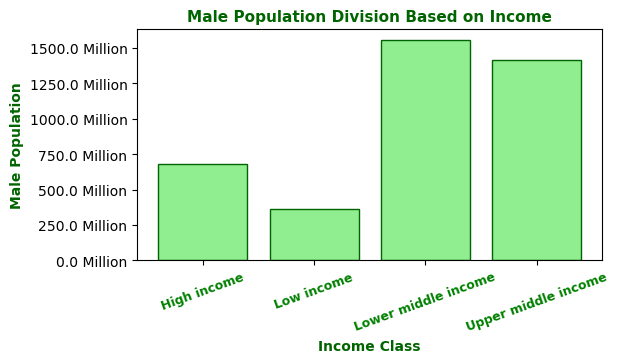

In [355]:
#creating the bar graph for it 
fig = plt.figure(figsize=(6, 3))
plt.bar(male_class.index, male_class['2023'], color='lightgreen', edgecolor = 'darkgreen')

# Define a function to format y-axis values in millions
def millions(x, pos):
    return '%1.1f Million' % (x * 1e-6)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))


#setting labels
plt.xlabel('Income Class', fontsize=10, fontweight='bold', color='darkgreen')
plt.ylabel('Male Population', fontsize=10, fontweight='bold', color='darkgreen')
plt.xticks(rotation = 20, fontsize=9, fontweight='bold', color='green')

#setting title
plt.title('Male Population Division Based on Income', fontsize=11, fontweight='bold', color='darkgreen')

plt.show()


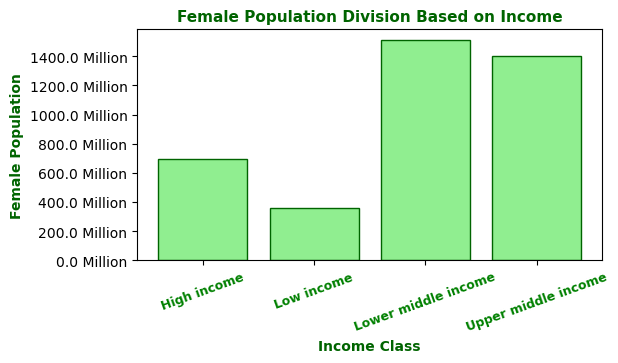

In [356]:
#creating the bar graph for it 
fig = plt.figure(figsize=(6, 3))
plt.bar(female_class.index, female_class['2023'], color='lightgreen', edgecolor = 'darkgreen')

# Define a function to format y-axis values in millions
def millions(x, pos):
    return '%1.1f Million' % (x * 1e-6)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))


#setting labels
plt.xlabel('Income Class', fontsize=10, fontweight='bold', color='darkgreen')
plt.ylabel('Female Population', fontsize=10, fontweight='bold', color='darkgreen')
plt.xticks(rotation = 20, fontsize=9, fontweight='bold', color='green')

#setting title
plt.title('Female Population Division Based on Income', fontsize=11, fontweight='bold', color='darkgreen')

plt.show()


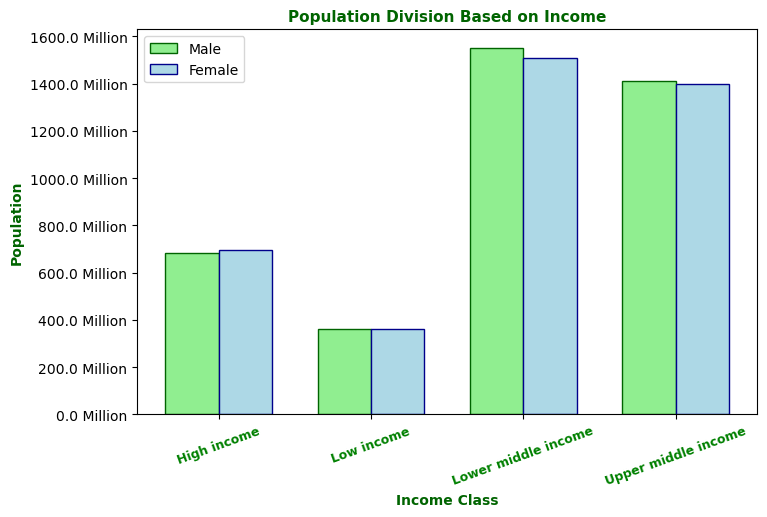

In [375]:
# Define a function to format y-axis values in millions
def millions(x, pos):
    return '%1.1f Million' % (x * 1e-6)

# Creating the bar graph for both male and female populations
fig, ax = plt.subplots(figsize=(8, 5))

# Width of a bar
bar_width = 0.35

# Positions of the bars on the x-axis
index = range(len(male_class))

# Plotting the bars
bar1 = ax.bar([i - bar_width/2 for i in index], male_class['2023'], bar_width, label='Male', color='lightgreen', edgecolor='darkgreen')
bar2 = ax.bar([i + bar_width/2 for i in index], female_class['2023'], bar_width, label='Female', color='lightblue', edgecolor='darkblue')

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(millions))

# Setting labels
ax.set_xlabel('Income Class', fontsize=10, fontweight='bold', color='darkgreen')
ax.set_ylabel('Population', fontsize=10, fontweight='bold', color='darkgreen')
ax.set_xticks(index)
ax.set_xticklabels(male_class.index, rotation=20, fontsize=9, fontweight='bold', color='green')

# Setting title
ax.set_title('Population Division Based on Income', fontsize=11, fontweight='bold', color='darkgreen')

# Adding a legend
ax.legend()

# Display the graph
plt.show()